In [1]:
import requests

In [37]:
#parameters = {"api_key":"DEMO_KEY"}
parameters = {"api_key":"ytzha4qESfaTo5CkSnoIcBNQ0H0cwvvNcUkEVLus"}
response = requests.get("https://api.nasa.gov/planetary/apod", params = parameters)

In [38]:
print(response.status_code)

200


In [6]:
requests.codes.ok

200

In [8]:
response.headers

{'Date': 'Wed, 13 Dec 2023 18:34:56 GMT', 'Content-Type': 'application/json', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Access-Control-Expose-Headers': 'X-RateLimit-Limit, X-RateLimit-Remaining', 'Age': '0', 'Content-Encoding': 'gzip', 'Strict-Transport-Security': 'max-age=31536000; includeSubDomains; preload', 'Vary': 'Accept-Encoding', 'Via': 'https/1.1 api-umbrella (ApacheTrafficServer [cMsSf ])', 'X-Api-Umbrella-Request-Id': 'ccchqu2qalguqe7bb6v0', 'X-Cache': 'MISS', 'X-Ratelimit-Limit': '40', 'X-Ratelimit-Remaining': '38', 'X-Vcap-Request-Id': '7fd01ca6-2595-4444-5065-d3974226fd03', 'X-Frame-Options': 'DENY', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block'}

In [9]:
response.text

'{"copyright":"\\nWilliam Ostling, \\nTelescope Live \\n","date":"2023-12-13","explanation":"What excites the Heart Nebula? First, the large emission nebula on the left, catalogued as IC 1805, looks somewhat like a human heart.  The nebula glows brightly in red light emitted by its most prominent element, hydrogen, but this long-exposure image was also blended with light emitted by silicon (yellow) and oxygen (blue).  In the center of the Heart Nebula are young stars from the open star cluster Melotte 15 that are eroding away several picturesque dust pillars with their atom-exciting energetic light and winds. The Heart Nebula is located about 7,500 light years away toward the constellation of Cassiopeia.  At the bottom right of the Heart Nebula is the companion Fishhead Nebula.  This wide and deep image clearly shows, though, that glowing gas surrounds the Heart Nebula in all directions.   Tonight watch: The Geminids","hdurl":"https://apod.nasa.gov/apod/image/2312/Heart_TelLiveOstling_

In [10]:
json_data=response.json()
type(json_data)

dict

In [13]:
#may need to do pip install pillow
from PIL import Image
from io import BytesIO
response = requests.get(json_data['url'])
img = Image.open(BytesIO(response.content))

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

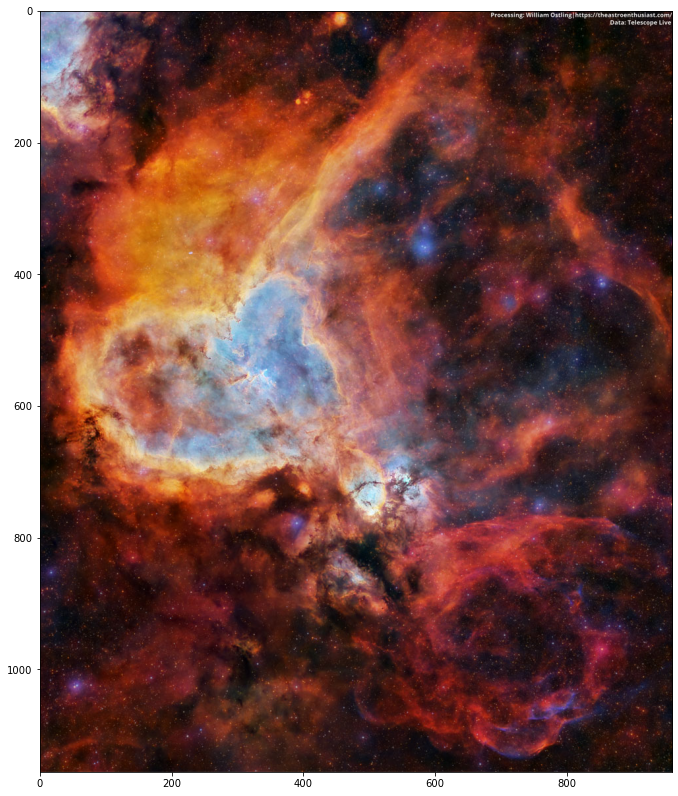

In [15]:
fig, ax = plt.subplots(figsize=(14,14))
ax.imshow(img)

1.3 Mars Rover's photo

In [39]:
#parameters = {"api_key":"DEMO_KEY", "sol":1000, "camera":"fhaz"}
parameters =  {"api_key":"ytzha4qESfaTo5CkSnoIcBNQ0H0cwvvNcUkEVLus", "sol":"1000", "camera":"fhaz"}
api_end_point="https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos"
response = requests.get(api_end_point, params=parameters)
response.status_code

200

In [40]:
json_data=response.json()
json_data

{'photos': [{'id': 102693,
   'sol': 1000,
   'camera': {'id': 20,
    'name': 'FHAZ',
    'rover_id': 5,
    'full_name': 'Front Hazard Avoidance Camera'},
   'img_src': 'http://mars.jpl.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/01000/opgs/edr/fcam/FLB_486265257EDR_F0481570FHAZ00323M_.JPG',
   'earth_date': '2015-05-30',
   'rover': {'id': 5,
    'name': 'Curiosity',
    'landing_date': '2012-08-06',
    'launch_date': '2011-11-26',
    'status': 'active',
    'max_sol': 4034,
    'max_date': '2023-12-11',
    'total_photos': 688186,
    'cameras': [{'name': 'FHAZ', 'full_name': 'Front Hazard Avoidance Camera'},
     {'name': 'NAVCAM', 'full_name': 'Navigation Camera'},
     {'name': 'MAST', 'full_name': 'Mast Camera'},
     {'name': 'CHEMCAM', 'full_name': 'Chemistry and Camera Complex'},
     {'name': 'MAHLI', 'full_name': 'Mars Hand Lens Imager'},
     {'name': 'MARDI', 'full_name': 'Mars Descent Imager'},
     {'name': 'RHAZ', 'full_name': 'Rear Hazard Avoidance Came

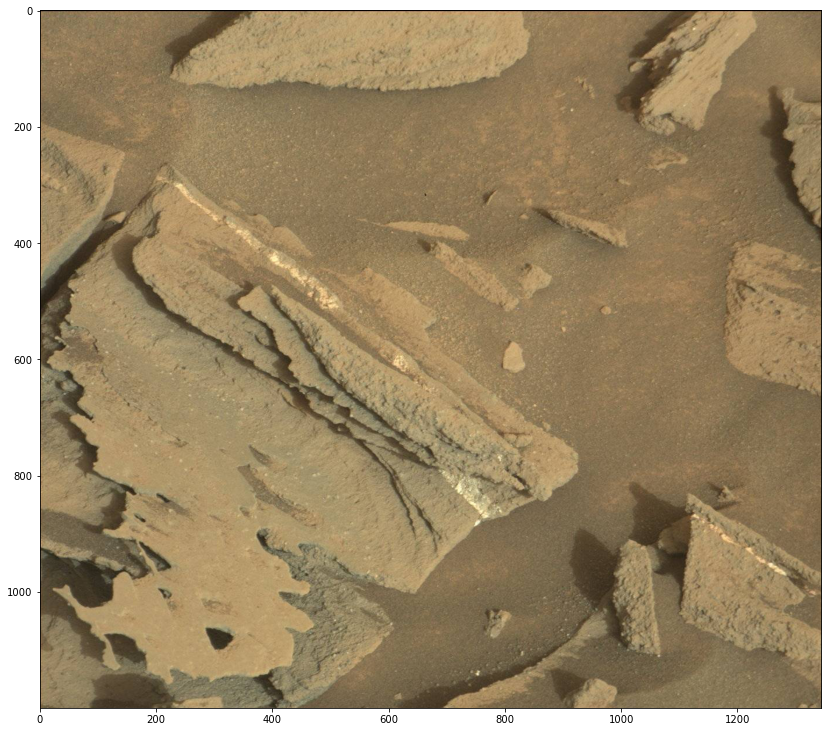

In [41]:
#this took 45 seconds on my system
img_src = 'http://mars.jpl.nasa.gov/msl-raw-images/msss/01000/mcam/1000ML0044631200305217E01_DXXX.jpg'
response = requests.get(image_data['img_src'])
fig, ax = plt.subplots(figsize = (14,14))
img = Image.open(BytesIO(response.content))
ax.imshow(img)

In [ ]:
#img_src = 'http://mars.jpl.nasa.gov/msl-raw-images/msss/01000/mcam/1000ML0044631200305217E01_DXXX.jpg'
#this seems to be taking forever...
for image_data in json_data['photos']:
    response = requests.get(image_data['img_src'])
    fig, ax = plt.subplots(figsize = (14,14))
    img = Image.open(BytesIO(response.content))
    ax.imshow(img)